# Linear Models for Classification

In this notebook, we will perform various classification tasks using Linear Regression, LDA and QDA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, metrics

In [2]:
def plot( clf, X, y, d = 0, clf_type='none'):
    cmap = plt.cm.coolwarm
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    if (d > 0):
        poly = PolynomialFeatures(d)
        temp = poly.fit_transform(temp)
    Z = clf.predict(temp)
    if(clf_type=='multiclass'):
        Z = np.argmax(Z, axis=1)
    elif(clf_type=='binary'):
        Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

# Simple Binary Classifier

Let us start with a simple task, on the Breast Cancer dataset. Classify the given dataset using Linear Regression.

In [3]:
dataset = datasets.load_breast_cancer()
X = dataset.data
print(X.shape)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

(569, 30)


In [4]:
X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)          
X_test= np.insert(X_test, 0, np.ones(X_test.shape[0]), axis=1)
# Normal equation 
# beta = (X^T * X)^-1 * X^T * y

X_transpose = np.transpose(X)
beta = np.linalg.inv(X_transpose.dot(X))
beta = beta.dot(X_transpose)
beta = beta.dot(y)
y_pred = X_test.dot(beta)
y_pred = (y_pred > 0.5).astype(int)

In [5]:
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

0.9824561403508771


In [6]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Multiclass Classification

In [7]:
def generate_data(example = 0, plot=False):
    
    class1G1Mean = np.array([0, -2])
    class1G2Mean = np.array([-2, 1])
    class2G1Mean = np.array([3, 6])
    class2G2Mean = np.array([4, 3])
    class2G3Mean = np.array([3, 0])
    class3G1Mean = np.array([-2, 6])
    class3G2Mean = np.array([1, 3])
    
    if(example==1):
        class1G1Cov = np.array([[1, 0], [0,3]])
        class1G2Cov = np.array([[1, 0], [0,1]])
        class2G1Cov = np.array([[2, 0], [0,1]])
        class2G2Cov = np.array([[1, 0], [0,2]])
        class2G3Cov = np.array([[1, 0], [0,1.5]])
        class3G1Cov = class2G1Cov+class1G1Cov
        class3G2Cov = class2G2Cov-class1G2Cov
        
    else:
        class1G1Cov = np.array([[1, 0], [0,1]])
        class1G2Cov = np.array([[1, 0], [0,1]])
        class2G1Cov = np.array([[1, 0], [0,1]])
        class2G2Cov = np.array([[1, 0], [0,1]])
        class2G3Cov = np.array([[1, 0], [0,1]])
        class3G1Cov = np.array([[1, 0], [0,1]])
        class3G2Cov = np.array([[1, 0], [0,1]])

    np.random.seed(1)
    class1G1x = np.random.multivariate_normal(class1G1Mean, class1G1Cov, 100)
    class1G2x = np.random.multivariate_normal(class1G2Mean, class1G2Cov, 75)
    class1y = np.zeros(175)
    class2G1x = np.random.multivariate_normal(class2G1Mean, class2G1Cov, 75)
    class2G2x = np.random.multivariate_normal(class2G2Mean, class2G2Cov, 50)
    class2G3x = np.random.multivariate_normal(class2G3Mean, class2G3Cov, 50)
    class2y = np.ones(175)
    class3G1x = np.random.multivariate_normal(class3G1Mean, class3G1Cov, 75)
    class3G2x = np.random.multivariate_normal(class3G2Mean, class3G2Cov, 50)
    class3y = np.ones(125)
    class3y.fill(2)

    class1x = np.concatenate((class1G1x, class1G2x), axis = 0)
    class2x = np.concatenate((class2G1x, class2G2x, class2G3x), axis = 0)
    class3x = np.concatenate((class3G1x, class3G2x), axis = 0)

    X = np.concatenate((class1x, class2x, class3x), axis=0)
    y = np.concatenate((class1y, class2y, class3y)).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    if(plot):
        plt.title('Plotting 2-dimensional 3-class data')
        plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
        plt.scatter(class2x[:,0], class2x[:,1], color = 'g', label = 'Class 1')
        plt.scatter(class3x[:,0], class3x[:,1], color = 'r', label = 'Class 2')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()        
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = generate_data(plot=True)

Classify the given dataset using Linear Regression and make a note of the accuracy.

Accuracy: 0.884211


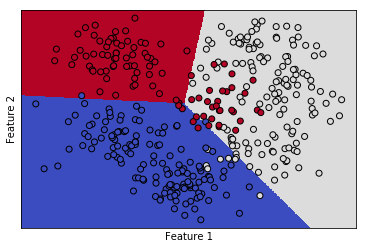

In [8]:
X_train, X_test, y_train, y_test = generate_data()

y_labels, y_train = np.unique(y_train, return_inverse=True)
y_encoded = np.eye(3)[y_train]
_, y_test = np.unique(y_test, return_inverse=True)

lr = LinearRegression()
lr.fit(X_train,y_encoded)
y_pred = lr.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %f' % acc)
plot(lr,X_train,y_train,d=0,clf_type='multiclass')

In [9]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


# Can we do better?

Using what you learned in the lectures, try to improve the performance of the Linear Regression classifier to the best possible extent. You should be able to get a testing accuracy of over 93%

In [10]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = generate_data()

y_labels_poly, y_train_poly = np.unique(y_train_poly, return_inverse=True)

d=len(y_labels_poly)-1 
poly = PolynomialFeatures(d)
X_train_poly = poly.fit_transform(X_train_poly)
X_test_poly = poly.fit_transform(X_test_poly)

y_encoded_poly = np.eye(3)[y_train_poly]
_, y_test_poly = np.unique(y_test_poly, return_inverse=True)

# Fit linear regression model on the transformed features

model = LinearRegression()
model.fit(X_train_poly,y_encoded_poly)
y_pred_poly = model.predict(X_test_poly)
y_pred_poly = np.argmax(y_pred_poly, axis=1)


acc = metrics.accuracy_score(y_test_poly,y_pred_poly)
print('Accuracy: %f' % acc)
plot(model, X_train,y_train,d,clf_type='multiclass')

Accuracy: 0.936842


In [11]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


## LDA and QDA

First use LDA to classify the same dataset as before, and make a note of its performance.

Accuracy: 0.926316


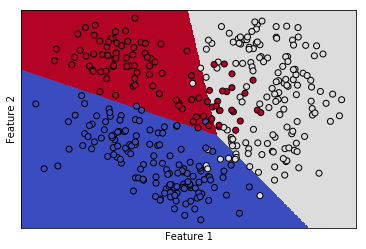

In [12]:
X_train, X_test, y_train, y_test = generate_data()

lda = LinearDiscriminantAnalysis( solver = 'lsqr',store_covariance=True)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %f' % acc)
plot(lda, X_train, y_train)

In [13]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Now use QDA to classify the same data, and make a note of its performance.

Accuracy: 0.947368


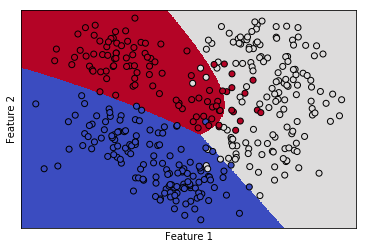

In [14]:
X_train, X_test, y_train, y_test = generate_data()
qda = QuadraticDiscriminantAnalysis( store_covariance = True )
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %f' % acc)
plot(qda, X_train, y_train)

In [219]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Now we will use a slightly different data distribution.

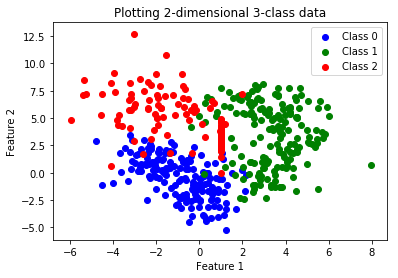

In [220]:
X_train, X_test, y_train, y_test = generate_data(1,plot=True)

Classify this data using LDA.

Accuracy: 0.905263


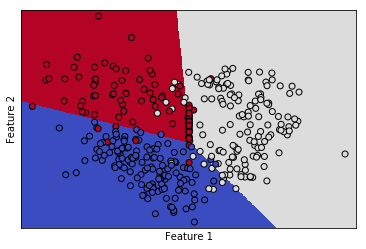

In [221]:
X_train, X_test, y_train, y_test = generate_data(1)
lda = LinearDiscriminantAnalysis( solver = 'lsqr',store_covariance=True)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %f' % acc)
plot(lda, X_train, y_train)

In [222]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Use QDA for the same dataset.

Accuracy: 0.968421


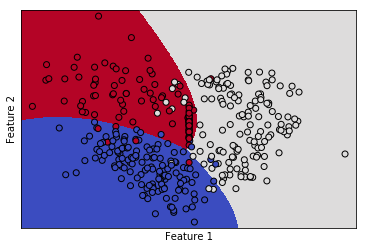

In [223]:
X_train, X_test, y_train, y_test = generate_data(1)
qda = QuadraticDiscriminantAnalysis( store_covariance = True )
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %f' % acc)
plot(qda, X_train, y_train)

In [224]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Note the performance of the classifiers in this case, and try to make a conclusion about what was different between the datasets.

# Circles and Moons

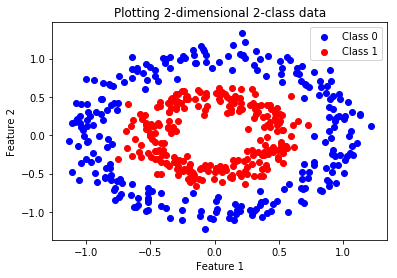

In [225]:
def generate_circle_dataset(plot=False):
    cd = datasets.make_circles(n_samples=500, noise=0.1, random_state=123, factor=0.5)
    X = cd[0]
    y = cd[1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    if(plot):
        X0 = X[y==0]
        X1 = X[y==1]
        plt.title('Plotting 2-dimensional 2-class data')
        plt.scatter(X0[:,0], X0[:,1], color = 'b', label = 'Class 0')
        plt.scatter(X1[:,0], X1[:,1], color = 'r', label = 'Class 1')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = generate_circle_dataset(plot=True)

Try classifying this dataset to the best possible accuracy, using Linear Regression.

In [229]:
X_train, X_test, y_train, y_test = generate_circle_dataset()


y_labels, y_train = np.unique(y_train, return_inverse=True)

d=2
print(d)

poly = PolynomialFeatures(d)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

y_encoded = np.eye(3)[y_train]
_, y_test = np.unique(y_test, return_inverse=True)

# Fit linear regression model on the transformed features
lr = LinearRegression()
lr.fit(X_train,y_encoded)
y_pred = lr.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %f' % acc)
#plot(lr,X_train,y_train,d,clf_type='binary')

2
Accuracy: 0.970000


In [230]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


To compare with your results above, use QDA for the same dataset.

Accuracy: 0.980000


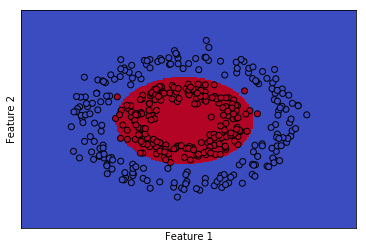

In [232]:
X_train, X_test, y_train, y_test = generate_circle_dataset()
qda = QuadraticDiscriminantAnalysis( store_covariance = True )
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %f' % acc)
plot(qda, X_train, y_train)

In [197]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Let us try another example.

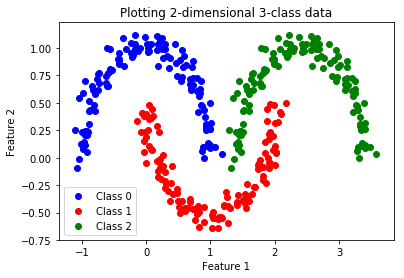

In [20]:
def generate_moon_dataset(plot=False):
    m1 = datasets.make_moons(n_samples=250, noise=0.07, random_state=123)
    X1 = m1[0]
    y1 = m1[1]

    m2 = datasets.make_moons(n_samples=250, noise=0.07, random_state=123)
    X2 = m2[0]+np.array([2.4,0])
    y2 = m2[1]
    X2 = X2[y2==0]
    y2 = y2[y2==0]+2
    X = np.concatenate((X1,X2))
    y = np.concatenate((y1,y2))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    if(plot):
        X0 = X[y==0]
        X1 = X[y==1]
        plt.title('Plotting 2-dimensional 3-class data')
        plt.scatter(X0[:,0], X0[:,1], color = 'b', label = 'Class 0')
        plt.scatter(X1[:,0], X1[:,1], color = 'r', label = 'Class 1')
        plt.scatter(X2[:,0], X2[:,1], color = 'g', label = 'Class 2')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = generate_moon_dataset(plot=True)

Classify the given dataset using Linear Regression, to the best possible accuracy.

In [35]:
X_train, X_test, y_train, y_test = generate_moon_dataset()
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

y_labels_poly, y_train_poly = np.unique(y_train, return_inverse=True)
y_encoded_poly = np.eye(3)[y_train_poly]
_, y_test_poly = np.unique(y_test, return_inverse=True)

# Fit linear regression model on the transformed features

lr = LinearRegression()
lr.fit(X_train_poly,y_encoded_poly)
y_pred_poly = lr.predict(X_test_poly)
y_pred_poly = np.argmax(y_pred_poly, axis=1)
y_test = y_test_poly
y_pred = y_pred_poly
d=2

acc = metrics.accuracy_score(y_test_poly,y_pred_poly)
print('Accuracy: %f' % acc)
plot(lr, X_train, y_train,d,clf_type='multiclass')

Accuracy: 0.840000


ValueError: shapes (39330,6) and (10,3) not aligned: 6 (dim 1) != 10 (dim 0)

In [200]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#
